In [1]:
from train import facialEmotionRecognition, reshape_df, reshape_target
import pandas as pd
import numpy as np

In [2]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [3]:
df = pd.read_csv('data/fer2013/fer2013.csv')

In [4]:
X_train, X_valid, y_train, y_valid = [], [], [], []

In [5]:
for emo, pixel, usage in df.values:
    if usage == 'Training':
        X_train.append(np.array(pixel.split(" "), 'float32'))
        y_train.append(emo)
    elif usage == 'PublicTest':
        X_valid.append(np.array(pixel.split(" "), 'float32'))
        y_valid.append(emo)


In [6]:
facial = facialEmotionRecognition()

In [7]:
X_train = reshape_df(X_train)
X_valid = reshape_df(X_valid)

In [8]:
y_train = reshape_target(y_train)
y_valid = reshape_target(y_valid)

In [9]:
facial.buildModel(num_classes)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________

In [10]:
facial.train_fit(X_train, y_train, batch_size, epochs)

Epoch 1/5
256/256 [==============================] - 209s 816ms/step - loss: 1.7949 - acc: 0.2574
Epoch 2/5
256/256 [==============================] - 243s 950ms/step - loss: 1.5909 - acc: 0.3658
Epoch 3/5
256/256 [==============================] - 215s 839ms/step - loss: 1.4360 - acc: 0.4419
Epoch 4/5
256/256 [==============================] - 211s 823ms/step - loss: 1.3056 - acc: 0.4993
Epoch 5/5
256/256 [==============================] - 208s 814ms/step - loss: 1.2175 - acc: 0.5341


In [15]:
train_score = facial.model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

valid_score = facial.model.evaluate(X_valid, y_valid, verbose=0)
print('Test loss:', valid_score[0])
print('Test accuracy:', 100*valid_score[1])

Train loss: 1.1910480067973193
Train accuracy: 53.92037630081177
Test loss: 1.272676760986277
Test accuracy: 51.23990178108215


In [19]:
import matplotlib.pyplot as plt

In [36]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

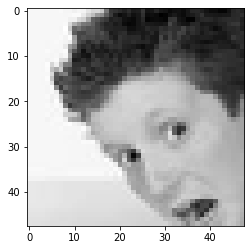

[0.04847954 0.00175028 0.16469125 0.17962617 0.48246613 0.02425043
 0.09873612]


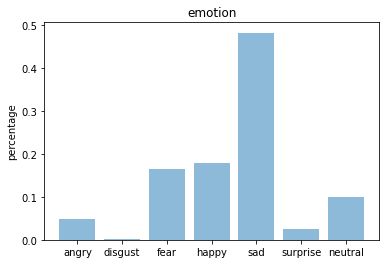

----------------------------------------------


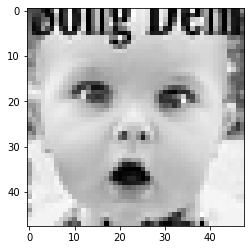

[1.3596762e-03 4.2588446e-05 2.1822289e-02 2.3833450e-03 7.5548555e-04
 9.7331166e-01 3.2504791e-04]


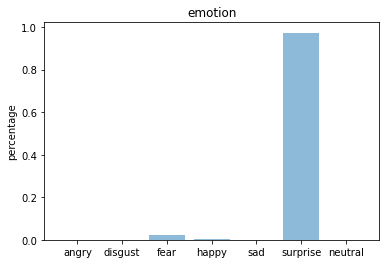

----------------------------------------------


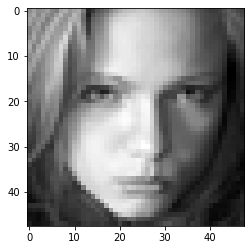

[0.19203253 0.00639962 0.14835009 0.01797478 0.3402177  0.01496403
 0.28006124]


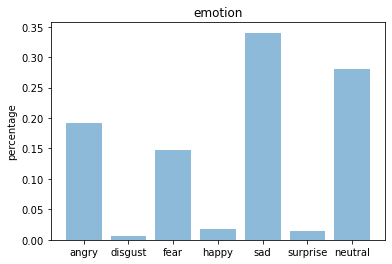

----------------------------------------------


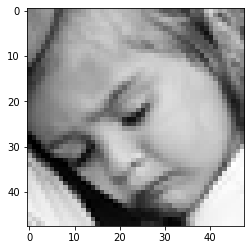

[0.04537256 0.00058682 0.15589687 0.11873937 0.5296634  0.0113998
 0.13834116]


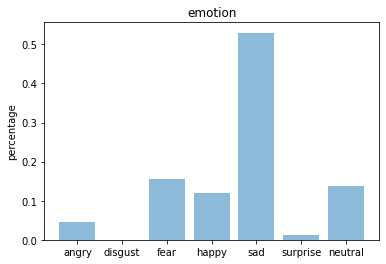

----------------------------------------------


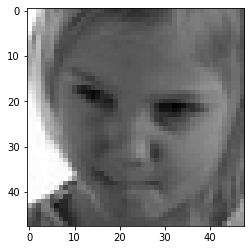

[0.21321    0.0110105  0.06287505 0.1894996  0.244329   0.00840105
 0.2706748 ]


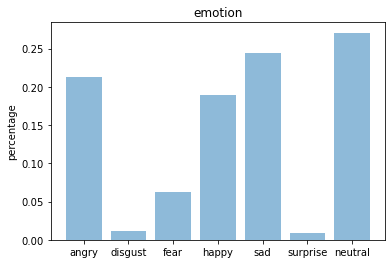

----------------------------------------------


In [39]:
monitor_validset_results = True

if monitor_validset_results == True:
    predictions = facial.model.predict(X_valid)

    index = 0
    for i in predictions:
        if index < 25 and index >= 20:
            valid_img = np.array(X_valid[index], 'float32')
            valid_img = valid_img.reshape([48, 48]);
            plt.imshow(valid_img)
            plt.show()
            print(i)
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1